In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from graphviz import Digraph
from sklearn.model_selection import GridSearchCV
import dtale

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConcl', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Class']
df = pd.read_csv(r'magic04.csv', header=None, names = cols)
df.loc[df['Class'] == 'g', ['Class']] = 1
df.loc[df['Class'] == 'h', ['Class']] = 0
df['Class'] = df['Class'].astype(int)

In [3]:
#df.apply(lambda x: sum(x.isnull()), axis=0)

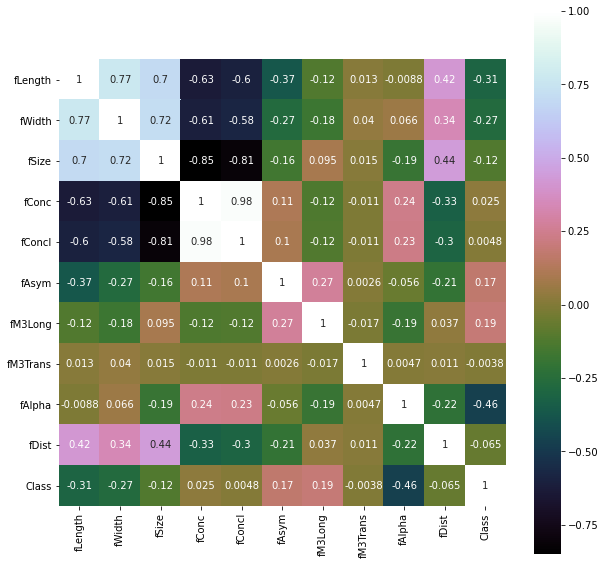

In [4]:
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

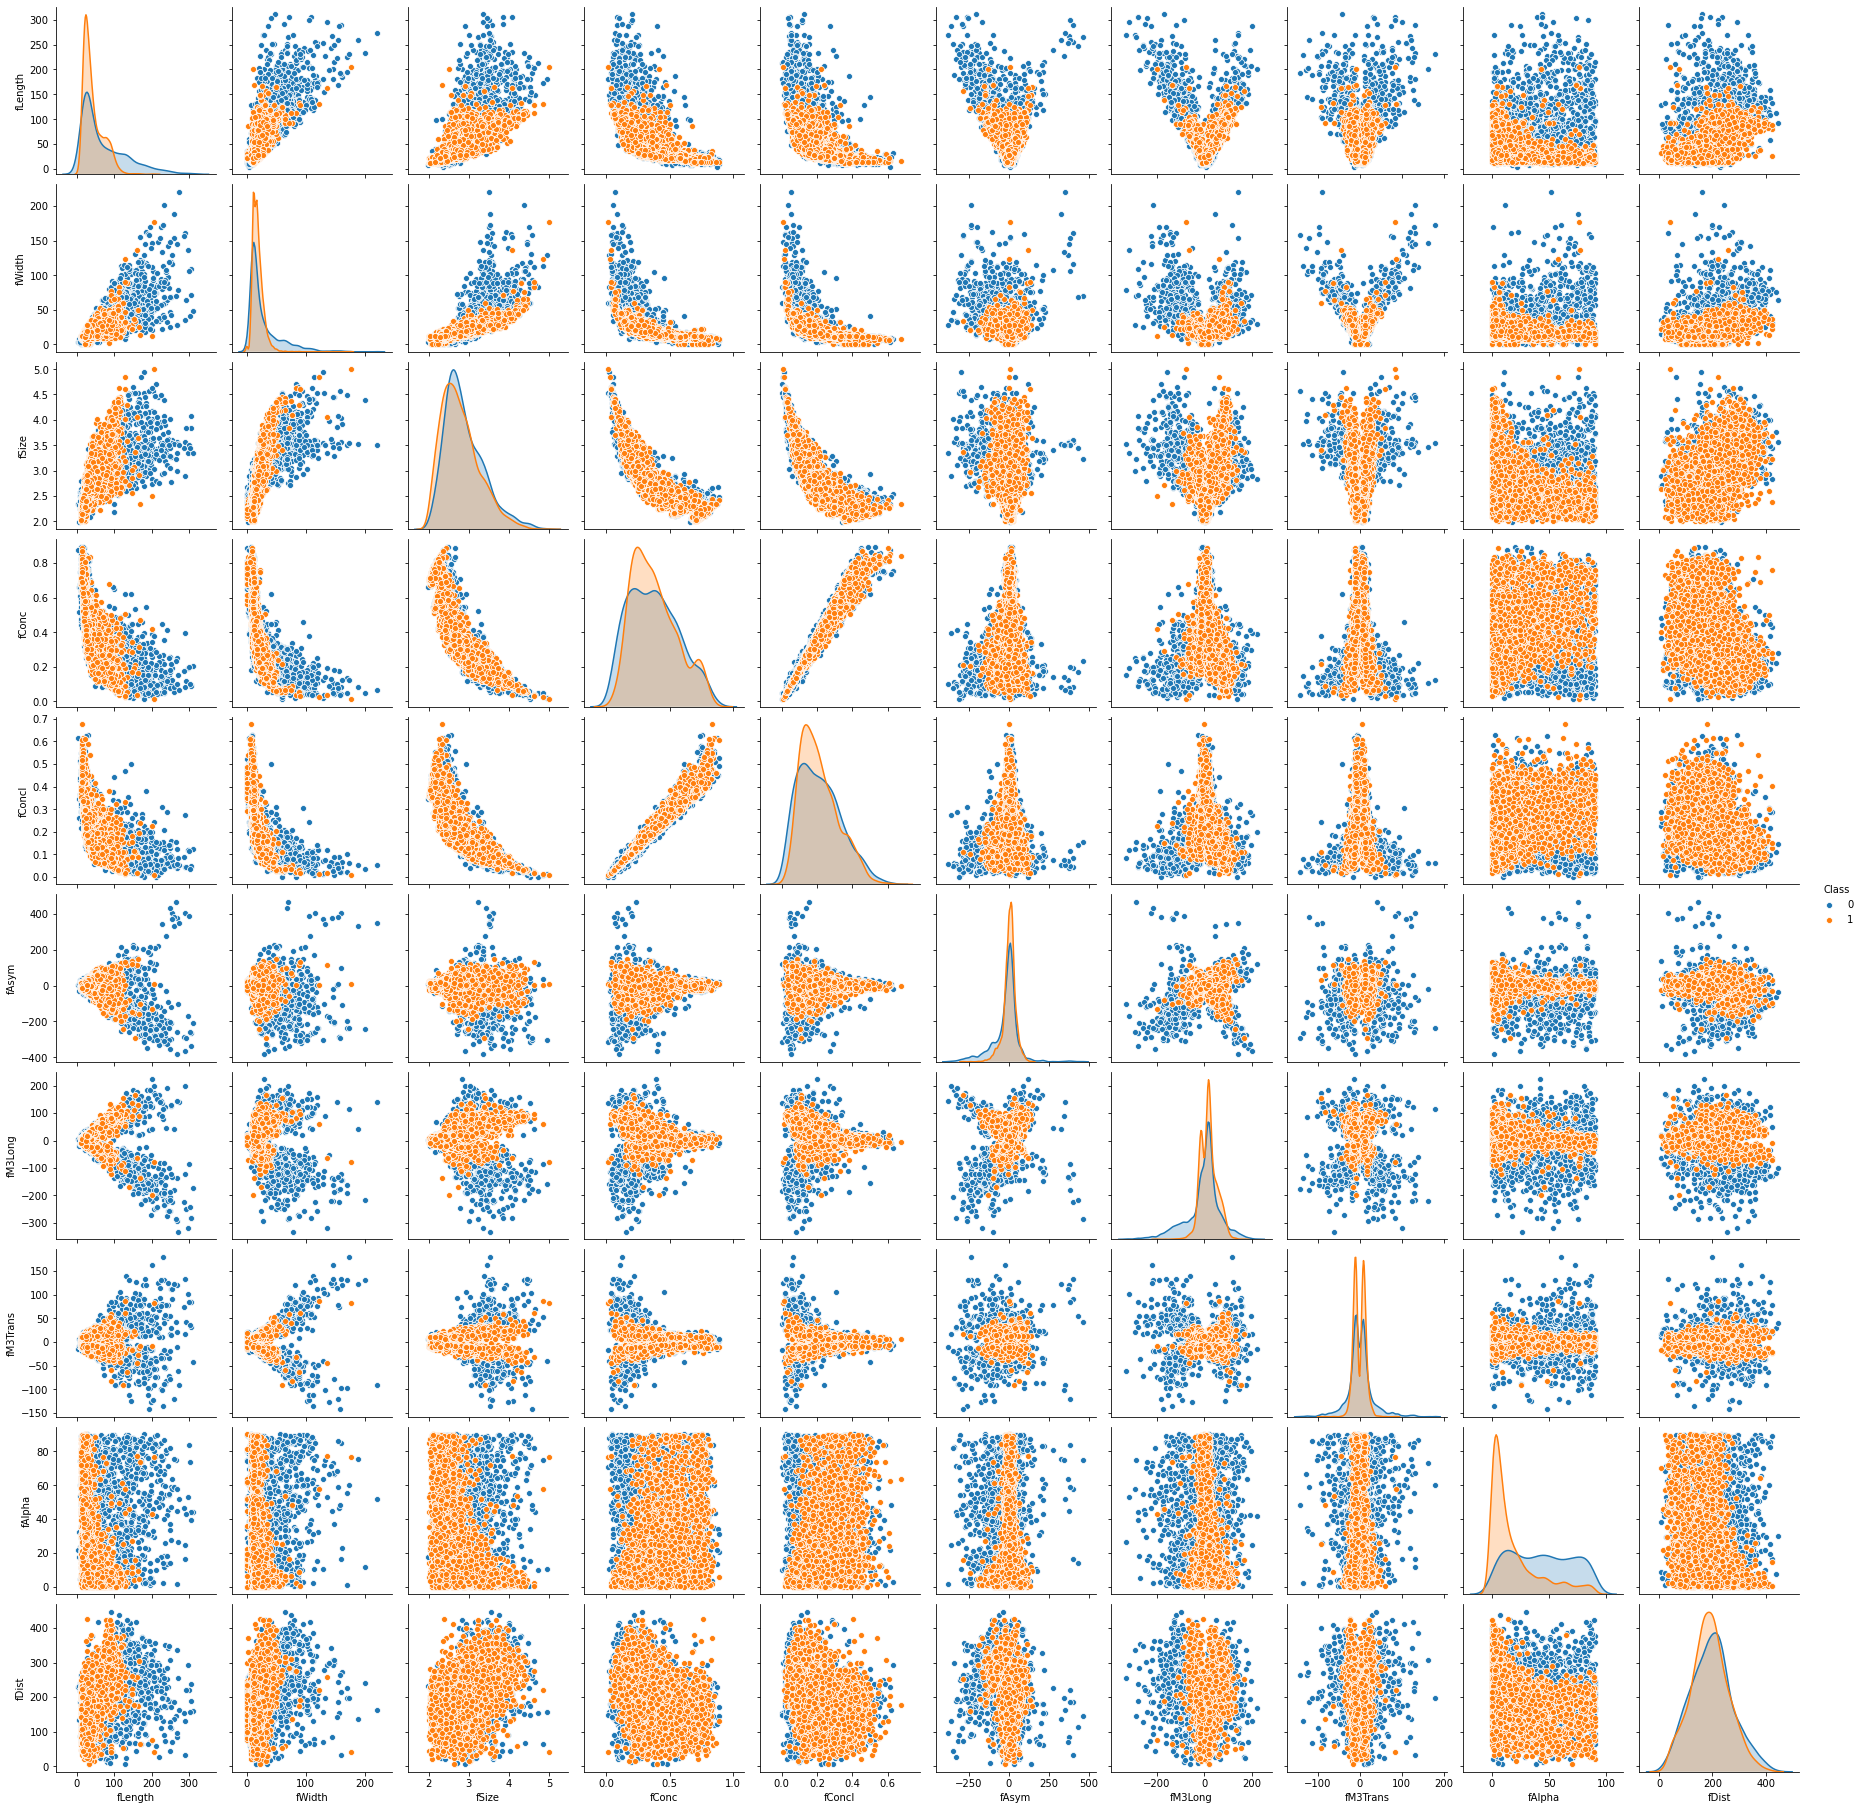

In [5]:
df_sample = df.sample(frac=0.3)
pplot = sns.pairplot(df_sample, hue="Class")

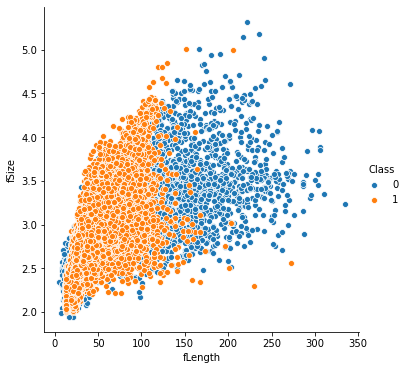

In [6]:
sns.pairplot(
    df,
    x_vars=["fLength"],
    y_vars=["fSize"], hue="Class", height= 5.0, aspect=1)

In [7]:
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
print(train.shape, test.shape, validate.shape)

(11412, 11) (3804, 11) (3804, 11)


In [8]:
y_train = train['Class']
x_train = train.drop(['Class'], axis=1)
y_test = test['Class']
x_test = test.drop(['Class'], axis=1)
y_validate = validate['Class']
x_validate = validate.drop(['Class'], axis=1)

In [9]:
y_test.mean()

0.639589905362776

In [10]:
y_train.mean()

0.6538731160182264

In [11]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), x_train), reverse=True))

Features sorted by their score:
[(0.2374, 'fAlpha'), (0.1549, 'fLength'), (0.1179, 'fWidth'), (0.1112, 'fSize'), (0.0854, 'fM3Long'), (0.0707, 'fDist'), (0.0585, 'fConc'), (0.0567, 'fConcl'), (0.0543, 'fM3Trans'), (0.0531, 'fAsym')]


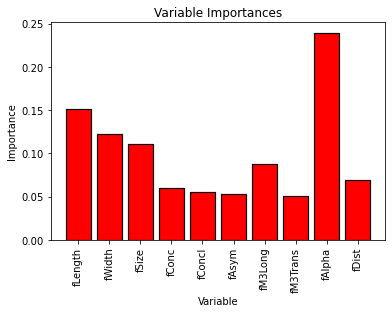

In [199]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, cols, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [12]:
#MODELS

In [13]:
#1 LOGISTIC REGRESSION

In [62]:
# Instantiate
logit_model = LogisticRegression(solver='lbfgs', max_iter=1000)
# Fit
logit_model = logit_model.fit(x_train, y_train)
# How accurate?
logit_model.score(x_train, y_train)
# Predictions on the test dataset
predicted = pd.DataFrame(logit_model.predict(x_test))
# Probabilities on the test dataset
probs = pd.DataFrame(logit_model.predict_proba(x_test))
metrics.accuracy_score(y_test, predicted)

# Store Metrics
logit_accuracy = metrics.accuracy_score(y_test, predicted)
logit_roc_auc = metrics.roc_auc_score(y_test, probs[1])
logit_confus_matrix = metrics.confusion_matrix(y_test, predicted)
logit_classification_report = metrics.classification_report(y_test, predicted)
logit_precision = metrics.precision_score(y_test, predicted, pos_label=1)
logit_recall = metrics.recall_score(y_test, predicted, pos_label=1)
logit_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

In [63]:
# Evaluate the model using 10-fold cross-validation
logit_cv_scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), x_test, y_test, scoring='precision', cv=10)
logit_cv_mean = np.mean(logit_cv_scores)

In [64]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 760  564]
 [ 280 2200]]


In [65]:
print(metrics.classification_report(y_test, predicted))
print(logit_cv_mean)

              precision    recall  f1-score   support

           0       0.73      0.57      0.64      1324
           1       0.80      0.89      0.84      2480

    accuracy                           0.78      3804
   macro avg       0.76      0.73      0.74      3804
weighted avg       0.77      0.78      0.77      3804

0.790058650223455


In [136]:
#DECISION TREES

In [120]:
# Instantiate with a max depth of 3
tree_model = DecisionTreeClassifier(max_depth=5) 
# Fit a decision tree
tree_model = tree_model.fit(x_train, y_train)
# Training accuracy
tree_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(tree_model.predict(x_test))
probs = pd.DataFrame(tree_model.predict_proba(x_test))

# Store metrics
tree_accuracy = metrics.accuracy_score(y_test, predicted)     
tree_roc_auc = metrics.roc_auc_score(y_test, probs[1])       
tree_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
tree_classification_report = metrics.classification_report(y_test, predicted)
tree_precision = metrics.precision_score(y_test, predicted, pos_label=1)
tree_recall = metrics.recall_score(y_test, predicted, pos_label=1)
tree_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# evaluate the model using 10-fold cross-validation
tree_cv_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=5), x_test, y_test, scoring='precision', cv=10)
tree_cv_mean = np.mean(tree_cv_scores)

print('Max Depth = 5')
print(metrics.classification_report(y_test, predicted))
print(tree_cv_mean)

Max Depth = 5
              precision    recall  f1-score   support

           0       0.78      0.64      0.70      1324
           1       0.82      0.91      0.86      2480

    accuracy                           0.81      3804
   macro avg       0.80      0.77      0.78      3804
weighted avg       0.81      0.81      0.81      3804

0.8251015253385766


In [ ]:
# output decision plot
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                     feature_names=x_test.columns.tolist(),
                     class_names=['Hadron', 'Gamma'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graph_from_dot_data(dot_data)
graph.write_png("desktop/decision_tree.png")

In [ ]:
#BAGGING CLASSIFIER

In [133]:
# Instantiate
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, max_samples=400, bootstrap=True, n_jobs=-1)

# Fit
bag_clf_model = bag_clf.fit(x_train, y_train)

# training accuracy
bag_clf_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(bag_clf.predict(x_test))
probs = pd.DataFrame(bag_clf.predict_proba(x_test))

# Store metrics
bag_clf_accuracy = metrics.accuracy_score(y_test, predicted)     
bag_clf_roc_auc = metrics.roc_auc_score(y_test, probs[1])       
bag_clf_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
bag_clf_classification_report = metrics.classification_report(y_test, predicted)
bag_clf_precision = metrics.precision_score(y_test, predicted, pos_label=1)
bag_clf_recall = metrics.recall_score(y_test, predicted, pos_label=1)
bag_clf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
bag_clf_cv_scores = cross_val_score(BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, max_samples=400, bootstrap=True, n_jobs=-1), x_test, y_test, scoring='precision', cv=10)
bag_clf_cv_mean = np.mean(bag_clf_cv_scores)

print(metrics.classification_report(y_test, predicted))
print(bag_clf_cv_mean)

              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1324
           1       0.85      0.93      0.89      2480

    accuracy                           0.85      3804
   macro avg       0.85      0.82      0.83      3804
weighted avg       0.85      0.85      0.85      3804

0.8455689896110561


In [ ]:
#VOTING ENSEMBLE

In [147]:
# Instantiate
logit_model = LogisticRegression(solver='lbfgs', max_iter=1000)
rf_clf = RandomForestClassifier()
svm_model = SVC(probability=True)


voting_clf = VotingClassifier(estimators = [('lr', logit_model), ('svc', svm_model), 
                                            ('rf', rf_clf)], voting = 'soft')

#FIT
voting_model = voting_clf.fit(x_train, y_train)

# training accuracy
voting_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(voting_model.predict(x_test))
probs = pd.DataFrame(voting_model.predict_proba(x_test))

# Store metrics
voting_model_accuracy = metrics.accuracy_score(y_test, predicted)     
voting_model_roc_auc = metrics.roc_auc_score(y_test, probs[1])       
voting_model_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
voting_model_classification_report = metrics.classification_report(y_test, predicted)
voting_model_precision = metrics.precision_score(y_test, predicted, pos_label=1)
voting_model_recall = metrics.recall_score(y_test, predicted, pos_label=1)
voting_model_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
voting_model_cv_scores = cross_val_score((VotingClassifier(estimators = [('lr', logit_model), ('svc', svm_model), 
                                            ('rf', rf_clf)], voting = 'soft')), x_test, y_test, scoring='precision', cv=10)
voting_model_cv_mean = np.mean(voting_model_cv_scores)

print(metrics.classification_report(y_test, predicted))
print(voting_model_cv_mean)

              precision    recall  f1-score   support

           0       0.84      0.67      0.74      1324
           1       0.84      0.93      0.88      2480

    accuracy                           0.84      3804
   macro avg       0.84      0.80      0.81      3804
weighted avg       0.84      0.84      0.84      3804

0.8249996141919788


In [148]:
#RANDOM FOREST

In [12]:
# Instantiate
rf = RandomForestClassifier(n_estimators = 50, random_state = 3, n_jobs = -1)
# Fit
rf_model = rf.fit(x_train, y_train)
# training accuracy
rf_model.score(x_train, y_train)
print(rf_model.score(x_train, y_train))

# Predictions/probs on the test dataset
predicted = pd.DataFrame(rf_model.predict(x_test))
probs = pd.DataFrame(rf_model.predict_proba(x_test))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)     
rf_roc_auc = metrics.roc_auc_score(y_test, probs[1])       
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
rf_classification_report = metrics.classification_report(y_test, predicted)
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators = 50, random_state = 3, n_jobs = -1), x_test, y_test, scoring='precision', cv=10)
rf_cv_mean = np.mean(rf_cv_scores)

print('n_estimators = 50, random_state = 3, n_jobs = -1')
print(metrics.classification_report(y_test, predicted))
print(rf_cv_mean)

0.9996494917630564
n_estimators = 50, random_state = 3, n_jobs = -1
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1371
           1       0.88      0.94      0.91      2433

    accuracy                           0.88      3804
   macro avg       0.88      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804

0.872847107878037


In [150]:
#SUPPORT VECTOR MACHINE

In [148]:
# Instantiate
svm_model = SVC(probability=True)
# Fit
svm_model = svm_model.fit(x_train, y_train)
# Accuracy
svm_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(svm_model.predict(x_test))
probs = pd.DataFrame(svm_model.predict_proba(x_test))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)     
svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])       
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
svm_classification_report = metrics.classification_report(y_test, predicted)
svm_precision = metrics.precision_score(y_test, predicted, pos_label=1)
svm_recall = metrics.recall_score(y_test, predicted, pos_label=1)
svm_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
svm_cv_scores = cross_val_score(SVC(probability=True), x_test, y_test, scoring='precision', cv=10)
svm_cv_mean = np.mean(svm_cv_scores)

print(metrics.classification_report(y_test, predicted))
print(svm_cv_mean)

              precision    recall  f1-score   support

           0       0.86      0.59      0.70      1324
           1       0.81      0.95      0.87      2480

    accuracy                           0.82      3804
   macro avg       0.83      0.77      0.79      3804
weighted avg       0.83      0.82      0.81      3804

0.7918859578449843


In [152]:
#KNN

In [154]:
# instantiate learning model (k = 3)
knn_model = KNeighborsClassifier(n_neighbors=3)
# fit the model
knn_model.fit(x_train, y_train)
# Accuracy
knn_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(knn_model.predict(x_test))
probs = pd.DataFrame(knn_model.predict_proba(x_test))

# Store metrics
knn_accuracy = metrics.accuracy_score(y_test, predicted)     
knn_roc_auc = metrics.roc_auc_score(y_test, probs[1])       
knn_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
knn_classification_report = metrics.classification_report(y_test, predicted)
knn_precision = metrics.precision_score(y_test, predicted, pos_label=1)
knn_recall = metrics.recall_score(y_test, predicted, pos_label=1)
knn_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
knn_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_test, y_test, scoring='precision', cv=10)
knn_cv_mean = np.mean(knn_cv_scores)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.75      0.60      0.66      1324
           1       0.81      0.89      0.85      2480

    accuracy                           0.79      3804
   macro avg       0.78      0.74      0.76      3804
weighted avg       0.79      0.79      0.78      3804



In [154]:
#TWO CLASS BAYES

In [155]:
# Instantiate
bayes_model = GaussianNB()
# Fit the model
bayes_model.fit(x_train, y_train)
# Accuracy
bayes_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(bayes_model.predict(x_test))
probs = pd.DataFrame(bayes_model.predict_proba(x_test))

# Store metrics
bayes_accuracy = metrics.accuracy_score(y_test, predicted)     
bayes_roc_auc = metrics.roc_auc_score(y_test, probs[1])       
bayes_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
bayes_classification_report = metrics.classification_report(y_test, predicted)
bayes_precision = metrics.precision_score(y_test, predicted, pos_label=1)
bayes_recall = metrics.recall_score(y_test, predicted, pos_label=1)
bayes_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
bayes_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_test, y_test, scoring='precision', cv=10)
bayes_cv_mean = np.mean(bayes_cv_scores)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.70      0.38      0.50      1324
           1       0.73      0.91      0.81      2480

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.65      3804
weighted avg       0.72      0.73      0.70      3804



In [209]:
models = pd.DataFrame({
  'Model': ['Logistic', 'Decision Tree', 'Random Forest', 'SVM', 'kNN',  'Bayes'],
  'Accuracy' : [logit_accuracy, tree_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, bayes_accuracy],
  'Precision': [logit_precision, tree_precision, rf_precision, svm_precision, knn_precision, bayes_precision],
  'Recall' : [logit_recall, tree_recall, rf_recall, svm_recall, knn_recall, bayes_recall],
  'F1' : [logit_f1, tree_f1, rf_f1, svm_f1, knn_f1, bayes_f1],
  'CV_Precision' : [logit_cv_mean, tree_cv_mean, rf_cv_mean, svm_cv_mean, knn_cv_mean, bayes_cv_mean]
})
# Print table and sort by test precision
models.sort_values(by='F1', ascending=False)

Model  Accuracy  Precision    Recall        F1  CV_Precision
2  Random Forest  0.877497   0.874197  0.945648  0.908520      0.862092
3            SVM  0.823081   0.812522  0.947177  0.874697      0.791886
1  Decision Tree  0.811777   0.823077  0.906048  0.862572      0.825102
4            kNN  0.789695   0.805455  0.893145  0.847036      0.786804
0       Logistic  0.778128   0.795948  0.887097  0.839054      0.790059
5          Bayes  0.728181   0.734893  0.912097  0.813962      0.786804

# Create x and y from all data
y = df['Class']
x = df.drop(['Class'], axis=1)

# Re-train model on all data
rf_model = rf.fit(x, y)

# Save model
import _pickle as cPickle
with open('gamma_classifier.pkl', 'wb') as fid:
    cPickle.dump(rf_model, fid)